# CO2 Emission Analysis 

In this notebook, we look at data for CO2 emissions. We want to find out, which countries have the highest aerage CO2 output over the last years and how their CO2 output compares over time. Additionally, we will look at the CO2 output per citizen for the United states and China.

### Data Source

The data for this notebook is retrieved from:  
https://www.kaggle.com/yoannboyere/co2-ghg-emissionsdata  
https://datahub.io/JohnSnowLabs/population-figures-by-country#resource-population-figures-by-country-csv

### Import 

In [ ]:
# import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm

In [2]:
# matplotlib default params
plt.style.use("default")

### CO2 Emission Data

In [3]:
# get data into dataframe
df = pd.read_csv("data/co2_emission.csv")

In [4]:
df.head(5)

,Entity,Code,Year,Annual CO2 Emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [5]:
# get all country names
# df["Entity"].unique()

In [6]:
# get all years
# np.sort(df["Year"].unique())

In [7]:
# get the five countries with the highest mean in co2 emissions from 2000 to 2017
filt = (df["Year"] >= 2000)
df_top = df.loc[filt].groupby("Entity").mean().reset_index().sort_values(by=["Annual CO2 Emissions"], ascending=False)
df_top.head(6)

,Entity,Year,Annual CO2 Emissions
226,World,2008.5,3.135634e+10
45,China,2008.5,7.259999e+09
219,United States,2008.5,5.745340e+09
13,Asia and Pacific (other),2008.5,4.412205e+09
61,EU-28,2008.5,3.971542e+09
4,Americas (other),2008.5,2.198533e+09


### Plot the top 5

[0 1 2 3 4]
[7259.998989666667, 5745.340441388889, 4412.205085666667, 3971.541594777778, 2198.5330185]


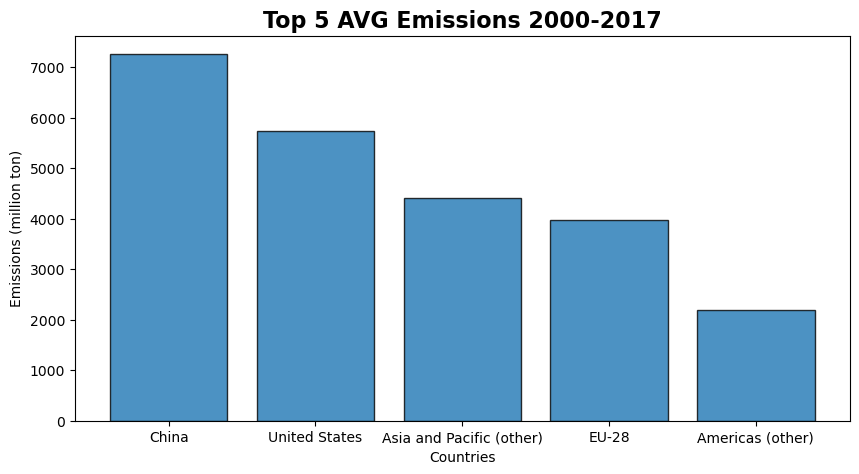

In [15]:
# size
plt.figure(figsize=(10,5), dpi=100)

# countries
y_pos = np.arange(len(df_top["Annual CO2 Emissions"].tolist()[1:6]))
print(y_pos)

# value list
val_list = list(map(lambda x: x/1000000, df_top["Annual CO2 Emissions"].tolist()[1:6]))
print(val_list)

# plot
plt.bar(y_pos, val_list, alpha=0.8, edgecolor="black")

# title
plt.title("Top 5 AVG Emissions 2000-2017", fontdict={"fontweight":"bold", "fontsize":16})

# ticks
plt.xticks(y_pos, df_top["Entity"].tolist()[1:6])
plt.yticks

# format axis
axes = plt.gca()
axes.ticklabel_format(axis="y", style="plain")

# labels
plt.ylabel("Emissions (million ton)")
plt.xlabel("Countries")

# show the plot
plt.show()

One can see that China and the United States have the highest average CO2 emissions between 2000 and 2017.

To see the evolution of CO2 emissions per year, we want to visualize the data for each year beginning with 2000 up to 2017 in a simple line chart.

['China', 'United States', 'Asia and Pacific (other)', 'EU-28', 'Americas (other)']


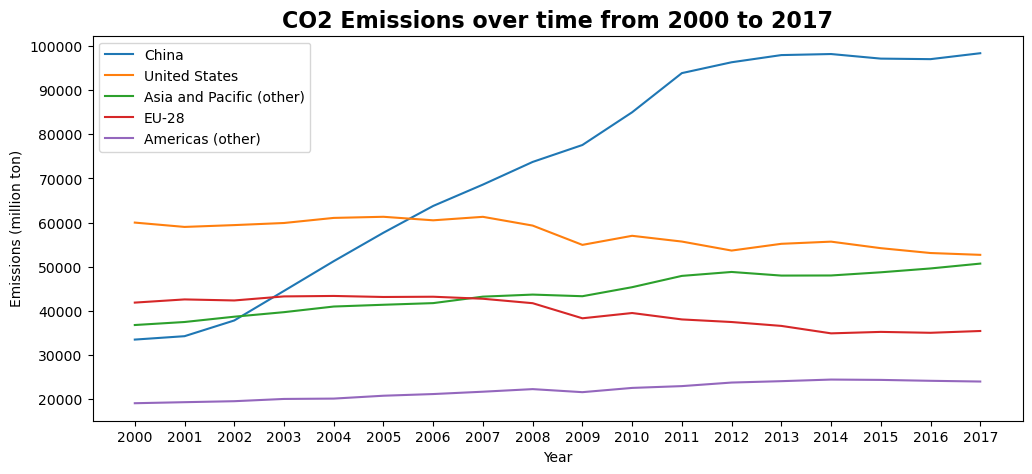

In [9]:
# size
plt.figure(figsize=(12,5))

# helper variables
years = [i for i in range(2000,2017+1)]
countries = df_top["Entity"].tolist()[1:6]
print(countries)

# title
plt.title("CO2 Emissions over time from 2000 to 2017", fontdict={"fontweight":"bold", "fontsize":16})

# data
for country in countries:
    # filter for years and country
    filt = ((df["Year"] >= 2000) & (df["Entity"] == country))
    # print(df.loc[filt, ["Year", "Annual CO2 Emissions"]])
    plt.plot(years, [l/100000 for l in df.loc[filt]["Annual CO2 Emissions"].tolist()], "-", label=country)

# ticks
plt.xticks(years)

# yscale
# plt.yscale("log")

# axis labels
plt.xlabel("Year")
plt.ylabel("Emissions (million ton)")

# legend
plt.legend()

# save plot
# plt.savefig("co2_emmissions_us_ca_aus.png", dpi=300)

# show
plt.show()

As we can see, China and Asian countries continue to increase their CO2 output over the years, whereas the United States have seen a small decrease over time.

China was at place 4 at the begin of the century and has seen a high increase in CO2 emissions over the last years.

These numbers give a good overview of total CO2 emissions but dont consider the relationship regarding the population of the countries.

In order to answer the question, if the increase of CO2 emissions regarding China is based on population increase, lets look at the emissions per citizen by first loading in population data.

### Population dataset

In [10]:
# get data into dataframe
df_pop = pd.read_csv("data/population-figures-by-country-csv_csv.csv")
df_pop.head(5)

,Country,Country_Code,Year_1960,Year_1961,Year_1962,Year_1963,Year_1964,Year_1965,Year_1966,Year_1967,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [11]:
# filter the countries
filt_us = (df_pop["Country"].isin(countries))
df_pop_f = df_pop[filt_us].set_index(["Country"]).iloc[:,41:]
df_pop_f

,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
Country,,,,,,,,,,,,,,,,,
China,1262645000,1271850000,1.280400e+09,1.288400e+09,1.296075e+09,1.303720e+09,1.311020e+09,1.317885e+09,1.324655e+09,1.331260e+09,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,1.378665e+09
United States,282162411,284968955,2.876252e+08,2.901079e+08,2.928053e+08,2.955166e+08,2.983799e+08,3.012312e+08,3.040940e+08,3.067715e+08,3.093482e+08,3.116634e+08,3.139984e+08,3.162049e+08,3.185635e+08,3.208966e+08,3.231275e+08


In [33]:
# dicitonary for annual co2 emissions
data_dict_em = {}
for c in ["China", "United States"]:
    filt = ((df["Year"] >= 2000) & (df["Entity"] == c) & (df["Year"] < 2017))
    data_dict_em[c] = [l for l in df.loc[filt]["Annual CO2 Emissions"].tolist()]
# data_dict_em

In [34]:
# dicitonary for population over time
data_dict_p = {}
for c in ["China", "United States"]:
    data_dict_p[c] = df_pop_f.loc[c].tolist()
# data_dict_p

In [35]:
# dictionary for the per citizen co2 output
em_p_dict = {}
for c in ["China", "United States"]:
    em_p_dict[c] = []
    for i in range(17):
        em_p_dict[c].append(data_dict_em[c][i] / data_dict_p[c][i])
# em_p_dict  

['China', 'United States']


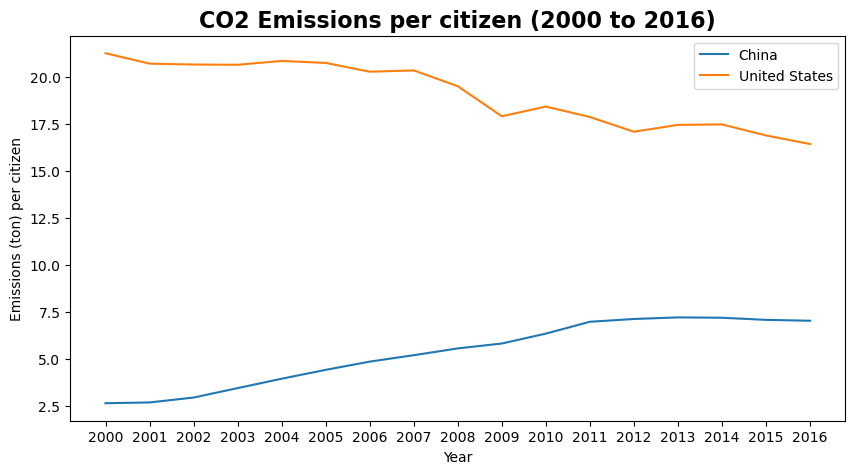

In [32]:
# size
plt.figure(figsize=(10,5))


# helper variables
years = [i for i in range(2000,2016+1)]

print(countries)

# title
plt.title("CO2 Emissions per citizen (2000 to 2016)", fontdict={"fontweight":"bold", "fontsize":16})

# plot the data
plt.plot(years, em_p_dict["China"], "-", label="China")
plt.plot(years, em_p_dict["United States"], "-", label="United States")

# ticks
plt.xticks(years)

# yscale
# plt.yscale("log")

# axis labels
plt.xlabel("Year")
plt.ylabel("Emissions (ton) per citizen")

# legend
plt.legend()

# save plot
# plt.savefig("co2_emmissions_us_ca_aus.png", dpi=300)

# show
plt.show()

China has a very low per citizen CO2 output comparted to the United States. However, the per citizen emissions for the United States are declining, whereas they are rising in China.